In [3]:
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import numpy as np

In [2]:
from sys import platform as _platform

#if _platform =='linux2':
#    path = '../data/data_sleep/' 
#else:
#    #mets ton path ici et ça devrait marcher :)
#    path = ""
path = ""

In [4]:
#train=pd.read_csv(path+"input_train.csv")
test=pd.read_csv(path+"input_test.csv")
#labels=pd.read_csv(path+"data/challenge_output_data_training_file_sleep_stages_classification.csv", sep=";")

In [4]:
labels=labels.set_index("ID")

In [5]:
labels.head()

,TARGET
ID,
ID00001,3
ID00002,2
ID00003,2
ID00004,3
ID00005,3


In [6]:
pd.unique(labels["TARGET"])

array([ 3.,  2.,  4.,  0.,  1.])

In [7]:
%matplotlib inline

In [8]:
label_name = ["Wake", "Somnolence", "Intermediate Sleep", "Deep Sleep", "REM"]

TypeError: histogram() got an unexpected keyword argument 'new'

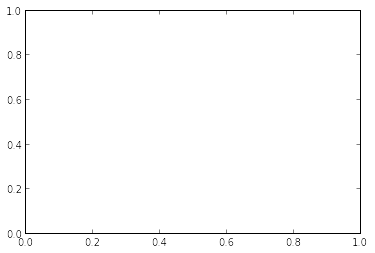

In [9]:
labels["TARGET"].hist(); plt.xticks(range(5), label_name, rotation=90)

In [ ]:
train.columns

In [ ]:
train.shape

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][:300].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][300:600].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][600:900].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][900:1200].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][1200:1500].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][1500:1800].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][1800:2100].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][2100:2400].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][2400:2700].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][2700:3000].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][3000:3300].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][3300:].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:5]) == "ACC_X"].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:5]) == "ACC_Y"].plot(figsize=(16,6))

In [ ]:
train.loc[0,train.columns.map(lambda x: x[:5]) == "ACC_Z"].plot(figsize=(16,6))

In [5]:
EEG = train.loc[:,train.columns.map(lambda x: x[:3]) == "EEG"]

In [5]:
def count_by_zero(array):
    counts = 0
    for i in range(0, len(array)-1):
        if np.sign(array[i]) != np.sign(array[i+1]):
            counts+=1
    return counts

In [6]:
dic_subtables = {
    "EEG": train.loc[:,train.columns.map(lambda x: x[:3]) == "EEG"],
    "ACC_X": train.loc[:,train.columns.map(lambda x: x[:5]) == "ACC_X"],
    "ACC_Y": train.loc[:,train.columns.map(lambda x: x[:5]) == "ACC_Y"],
    "ACC_Z": train.loc[:,train.columns.map(lambda x: x[:5]) == "ACC_Z"],
}

In [6]:
dic_subtables_test = {
    "EEG": test.loc[:,test.columns.map(lambda x: x[:3]) == "EEG"],
    "ACC_X": test.loc[:,test.columns.map(lambda x: x[:5]) == "ACC_X"],
    "ACC_Y": test.loc[:,test.columns.map(lambda x: x[:5]) == "ACC_Y"],
    "ACC_Z": test.loc[:,test.columns.map(lambda x: x[:5]) == "ACC_Z"],
}

In [13]:
%pdb

Automatic pdb calling has been turned ON


In [11]:
dic_subtables[dic_subtables.keys()[0]].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            31119, 31120, 31121, 31122, 31123, 31124, 31125, 31126, 31127,
            31128],
           dtype='int64', length=31129)

In [13]:
import numpy as np

In [ ]:
def create_stat_features(dic_subtables):

    quantiles = pd.concat([dic_subtables[key].quantile(np.linspace(0,1,11), axis=1).T 
                           for key in dic_subtables.keys()
                          ], axis=1)
    cols_int = [["{}_quantile_{}".format(k, key) for k in range(0,110,10)]for key in dic_subtables.keys()]
    quantiles.columns = [name for list_names in cols_int for name in list_names]
    
    means = pd.concat([
            pd.Series(
                dic_subtables[key].mean(axis=1), name = "mean_{}".format(key)
            ) 
            for key in dic_subtables.keys()
        ],
                      axis=1
                         )
    var = pd.concat([
            pd.Series(
                dic_subtables[key].var(axis=1), name= "var_{}".format(key)
            ) 
            for key in dic_subtables.keys()
        ],
                      axis=1
                         )
    skew = pd.concat([
            pd.Series(
                dic_subtables[key].skew(axis=1), name = "skew_{}".format(key)
            ) 
            for key in dic_subtables.keys()
        ],
                      axis=1
                         )
    kurt = pd.concat([
            pd.Series(
                dic_subtables[key].kurtosis(axis=1), name="kurt_{}".format(key)
            )
            for key in dic_subtables.keys()
        ],
                      axis=1
                         )
    
    return pd.concat([quantiles, means, var, skew, kurt], axis=1)

In [48]:
%pdb

Automatic pdb calling has been turned OFF


In [22]:
stat_feats=pd.concat([create_stat_features(dic_subtables), dic_subtables["EEG"].apply(count_by_zero, axis=1)], axis=1)

In [ ]:
stat_feats_test=pd.concat([create_stat_features(dic_subtables_test), dic_subtables_test["EEG"].apply(count_by_zero, axis=1)], axis=1)

In [31]:
stat_feats=stat_feats.rename(columns ={0:"through_0"})

In [ ]:
stat_feats_test=stat_feats_test.rename(columns ={0:"through_0"})

In [32]:
stat_feats.to_csv("data_stat_feats.csv")

In [ ]:
stat_feats_test.to_csv("data_stat_feats_test.csv")

In [16]:
EEG = train.loc[:,train.columns.map(lambda x: x[:3]) == "EEG"]

In [17]:
EEG.head()

,EEG,EEG.1,EEG.2,EEG.3,EEG.4,EEG.5,EEG.6,EEG.7,EEG.8,EEG.9,...,EEG.3740,EEG.3741,EEG.3742,EEG.3743,EEG.3744,EEG.3745,EEG.3746,EEG.3747,EEG.3748,EEG.3749
0,20.469670,17.671657,-24.879872,-21.582978,21.491586,17.547432,-24.135601,-16.297840,21.626454,9.273408,...,-12.779164,-21.350602,-20.805656,-15.694524,-19.520854,-26.890344,-27.258306,-23.737574,-22.696332,-23.669286
1,-11.683054,-12.683877,-13.598863,-13.675340,-14.103568,-14.069579,-13.794284,-14.866398,-15.633732,-16.138510,...,-10.440109,-10.289041,-9.273034,-8.764309,-8.369052,-6.682524,-5.576505,-4.306308,-3.276318,-2.787633
2,2.003505,2.778169,2.281967,2.435862,3.395078,4.218081,4.706549,4.742208,5.448266,4.207758,...,-1.783160,-3.080529,-5.181710,-6.461718,-6.099080,-7.221442,-8.459056,-8.226971,-8.723016,-8.768678
3,-7.299155,-6.968581,-5.533800,-6.716337,-7.398124,-5.234119,-6.656640,-8.232919,-7.755555,-6.950687,...,-10.259601,-10.889224,-13.309002,-12.555352,-11.502696,-14.792960,-19.229624,-21.080427,-25.444052,-34.141049
4,-10.082229,-8.332412,-9.104915,-11.339889,-10.391075,-9.357694,-10.535955,-12.333182,-11.797761,-9.857576,...,20.975227,21.730135,20.605502,20.153711,19.840066,20.573808,19.695302,18.248385,17.515416,17.228777


In [96]:
stat_feats.shape

(31129, 60)

In [29]:
import re

In [33]:
re.search("EEG[0,9]*", "EEG100").group(0)

'EEG'

In [40]:
train_eeg = train.filter(regex='EEG[0-9]*').values

In [44]:
X_fft = np.fft.fft(train_eeg)

In [46]:
X_fft.shape, train_eeg.shape

((31129, 3750), (31129, 3750))

In [47]:
X_fft

array([[-1909.42653316   +0.j        ,  -279.23464975  +69.28174235j,
         -274.16229518 -557.53318724j, ..., -2260.95353687  -43.88507285j,
         -274.16229518 +557.53318724j,  -279.23464975  -69.28174235j],
       [ -929.45682008   +0.j        ,  -800.83171222  -53.81930113j,
         -800.48904681 -114.12952051j, ...,  -510.71876672 +252.17807299j,
         -800.48904681 +114.12952051j,  -800.83171222  +53.81930113j],
       [  180.44603631   +0.j        ,  1113.65876488 +156.28430561j,
         1594.09505881  +27.12505525j, ...,  3653.34822652 -605.13562242j,
         1594.09505881  -27.12505525j,  1113.65876488 -156.28430561j],
       ..., 
       [  866.83464164   +0.j        ,   948.56674269  +36.72003705j,
          820.89324288 +227.01579472j, ...,  1660.00397247 -324.02431918j,
          820.89324288 -227.01579472j,   948.56674269  -36.72003705j],
       [-1069.34236668   +0.j        ,   547.71480129 +264.55047932j,
          715.48822733 +318.46559052j, ...,   125.679

In [54]:
train

,ID,SLEEPER_ID,SIGNAL_ID,IDX_IN_NIGHT,EEG,EEG.1,EEG.2,EEG.3,EEG.4,EEG.5,...,ACC_Z.140,ACC_Z.141,ACC_Z.142,ACC_Z.143,ACC_Z.144,ACC_Z.145,ACC_Z.146,ACC_Z.147,ACC_Z.148,ACC_Z.149
0,ID00001,15,2700,392,20.469670,17.671657,-24.879872,-21.582978,21.491586,17.547432,...,1682174.238020,1597511.330750,972186.443428,1450980.341200,180180.648705,1640876.415880,710530.100301,841146.171045,1681848.389830,458333.967975
1,ID00002,38,3947,347,-11.683054,-12.683877,-13.598863,-13.675340,-14.103568,-14.069579,...,109133.057624,109321.261047,109986.038619,109142.868859,109763.274161,108703.242339,109611.069608,109100.029788,109615.061360,109136.944179
2,ID00003,32,2566,868,2.003505,2.778169,2.281967,2.435862,3.395078,4.218081,...,1681984.491850,398557.648751,284941.900574,1502318.755480,41257.611421,1052659.808270,581.862549,701898.041120,552.954118,1036582.159380
3,ID00004,58,2904,1042,-7.299155,-6.968581,-5.533800,-6.716337,-7.398124,-5.234119,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ID00005,24,3099,141,-10.082229,-8.332412,-9.104915,-11.339889,-10.391075,-9.357694,...,261169.231394,261350.720987,261248.106989,261310.098257,261088.280172,261439.738978,260730.414916,261649.299551,261402.619150,261440.810499
5,ID00006,50,2967,286,-16.470497,-13.235379,-13.263489,-13.170964,-13.627989,-16.082086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,ID00007,14,3037,201,-5.344949,-2.267162,-1.255967,-5.693706,-5.241420,-4.290564,...,1012570.247890,232295.147300,131373.539013,376819.436086,195839.965699,1429.065659,2141.132827,2134.694649,2635.909102,2646.105927
7,ID00008,24,2002,1137,0.795968,0.780218,1.001949,0.859881,1.469086,2.329190,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,ID00009,25,3192,1248,1.388671,-0.814875,-1.857547,-0.024442,0.311098,0.124120,...,1287188.852880,1287104.422760,1287423.594210,1287076.937380,1287144.464770,1287213.500850,1287230.482880,1287417.385810,1286782.089720,1287404.426430
9,ID00010,22,1936,378,3.143309,4.039984,5.170629,4.709372,8.401500,6.895580,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


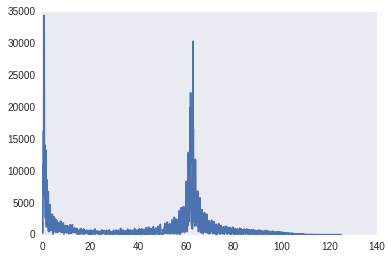

In [69]:
freq = np.fft.fftfreq(15*250, 1./250)
plt.plot(freq[0:len(freq)/2],np.abs(X_fft[0][0:len(X_fft[0])/2]))
plt.grid()
plt.show()

In [102]:
def filt(y,low, high, freq): 
    filter_array = [i for i,f in enumerate(freq) if f>=low and f<=high]
    return np.array([y[i] for i in filter_array])

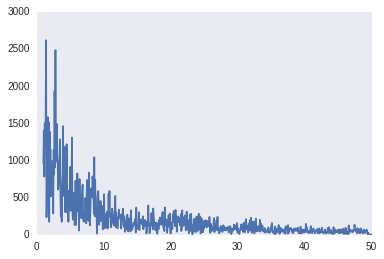

In [101]:
plt.plot(filt(freq,1,50,freq),np.abs(filt(X_fft[18],1,50,freq)))
plt.grid()
plt.show()

In [103]:
X_fft.apply(lambda x: filt(y,1,50,x))

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [110]:
X_ffr = np.apply_along_axis(lambda x: filt(x,1,50,freq), 1 , abs(X_fft))

In [111]:
X_ffr.shape

(31129, 736)

In [114]:
filtered_freq = filt(freq,1,50,freq)
X_fft = pd.DataFrame(X_ffr, columns= ["freq"+str(f) for f in filtered_freq])

In [117]:
X_fft.to_csv("data_frequences.csv")